In [1]:
%matplotlib notebook

In [2]:
import qutip as _qt
import pydux.lib.simulations.ms_gate_simulation as _ms_gate
import matplotlib.pyplot as _plt
import numpy as _np
import matplotlib.animation as _ani
from matplotlib import rc as _rc
from IPython.display import HTML
import matplotlib

In [3]:
_rc('animation', html='html5')

In [4]:
gate = _ms_gate.MSGateSimulation()

In [5]:
delta_g = gate._delta_g
rho_in = _qt.basis(80, 0)
times = _np.linspace(0, 2*gate.gate_time*102/100, 102)
after_ms = gate._gate_H(delta_g, rho_in, times)
len(after_ms.states)

102

In [6]:
#after_ms.states[1].full()

In [7]:
states = _np.zeros((80,100), dtype=_np.complex128)
for jj in range(80):
    for kk in range(100):
        states[jj][kk] =after_ms.states[kk].full()[jj]

In [8]:
for jj in range(len(states[0])):
    sum = 0
    for kk in range(len(states)):
        sum += _np.abs(states[kk][jj])**2

<IPython.core.display.Javascript object>


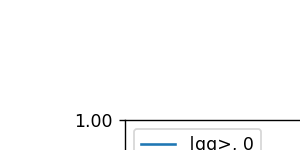

In [11]:
phonon_states = [0,1,2]


fig = _plt.figure(figsize=(7,7))
ax = _plt.axes(xlim=(-1, 1), ylim=(-1, 1))
ax.set_xlabel("Coefficient real part")
ax.set_ylabel("Coefficient imag part")
ax.add_artist(matplotlib.patches.Circle((0,0), _np.sqrt(1/2), label="p=1/2", fill=False, linestyle="dashed", edgecolor=(0,0,0,0.25)))
time_marker=ax.text(0.5, 0.85, "$t/t_{gate}=0$")
line00s = [None]*len(phonon_states)
line10s = [None]*len(phonon_states)
line01s = [None]*len(phonon_states)
line11s = [None]*len(phonon_states)

for jj in range(len(phonon_states)):
    line00s[jj], = ax.plot([],[], label="|gg>, " + str(phonon_states[jj]))
    line10s[jj], = ax.plot([],[], label="|eg>, " + str(phonon_states[jj]))
    line01s[jj], = ax.plot([],[], linestyle="dotted", label="|ge>, " + str(phonon_states[jj]))
    line11s[jj], = ax.plot([],[], linestyle="dashed", label="|ee>, " + str(phonon_states[jj]))
ax.legend(loc='upper left')

In [12]:
def animate(frame):
    for kk in range(len(phonon_states)):
        jj = phonon_states[kk]
        line00s[kk].set_data(_np.real(states[jj][0:frame:]), _np.imag(states[jj][0:frame:]))
        line10s[kk].set_data(_np.real(states[jj+20][0:frame:]), _np.imag(states[jj+20][0:frame:]))
        line01s[kk].set_data(_np.real(states[jj+40][0:frame:]), _np.imag(states[jj+40][0:frame:]))
        line11s[kk].set_data(_np.real(states[jj+60][0:frame:]), _np.imag(states[jj+60][0:frame:]))
        time_marker.set_text("$t/t_{gate}=$"+str(2*frame/100))
animation = _ani.FuncAnimation(fig, animate, frames=100)
animation.save("ms_gate_start_n1test.gif", writer='pillow')

In [ ]:
_np.imag(1/_np.sqrt(2))